# Titanic Survival Data Exploration
## Decision Tree Classifier

### feature info of this dataset ( from Kaggle)
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

## Load Data

In [114]:
#importing libraries
import pandas as pd
import random
import numpy as np

#read the dataset
df=pd.read_csv('titanic.csv')

#display the first 5 rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [115]:
#diaplay information for each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [116]:
#dispaly statistical feature of data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


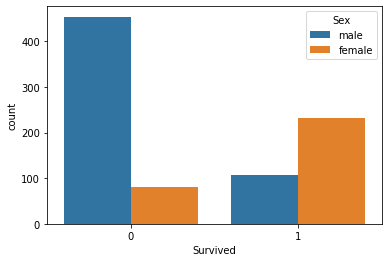

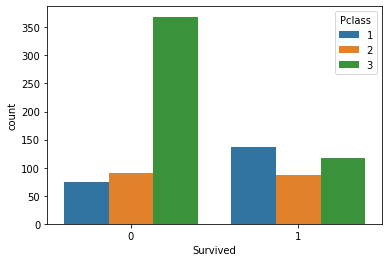

In [128]:
## plot the distribution of target variable based on Sex and Pclass
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.countplot(x='Survived',hue='Sex', data = df)
plt.figure()
sns.countplot(x='Survived',hue='Pclass', data = df)

### from above we can see Age and Cabin all have missing values, which we will deal with later
### Also the countplot shows sex and class have some influence on survive. Women seem to have higher survival rate than men, and upper class has higher survival rate than lower class

## Data Preprocessing

In [129]:
#creat independent and dependent variables
# store suvived feature as dependent variable
y=df['Survived']
#store other feature as independent variables
#PassageId and Name seems irrelevant, so drop them from X
X = df.drop(['Survived','PassengerId','Name'],axis=1)
#display first 5 rows of X
X.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,female,35.0,1,0,113803,53.1000,C123,S
4,3,male,35.0,0,0,373450,8.0500,NaN,S


### Deal with Missing Values

In [130]:
#deal with numeric missing value in X
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp=imp.fit(X.iloc[:,2:3])
X.iloc[:,2:3]=imp.transform(X.iloc[:,2:3])

#deal with categorical missing value in X
imp = SimpleImputer(strategy="most_frequent")
X.iloc[:,7:8]=imp.fit_transform(X.iloc[:,7:8])

#deal with 2 missing value in Embarked
X=X.fillna(0.0)

#display information about features
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 876 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    876 non-null    int64  
 1   Sex       876 non-null    object 
 2   Age       876 non-null    float64
 3   SibSp     876 non-null    int64  
 4   Parch     876 non-null    int64  
 5   Ticket    876 non-null    object 
 6   Fare      876 non-null    float64
 7   Cabin     876 non-null    object 
 8   Embarked  876 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 108.4+ KB


### Create Dummy Variable

In [131]:
#create dummy variables
X=pd.get_dummies(X)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Ticket_110152,Ticket_110413,Ticket_110465,...,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_0.0,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Split into Training and Testing Set

In [132]:
#split data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14,stratify = y)

## Model Building

In [133]:
#import decision tree classifier
from sklearn.tree import DecisionTreeClassifier,plot_tree

#create classifier and fit it to training data
model = DecisionTreeClassifier(random_state=23)
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=23, splitter='best')

In [134]:
#make prediction on test data
y_pred = model.predict(X_test)

#import confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, y_pred),'\n')
print(classification_report(y_test, y_pred))

[[96 11]
 [18 51]] 

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       107
           1       0.82      0.74      0.78        69

    accuracy                           0.84       176
   macro avg       0.83      0.82      0.82       176
weighted avg       0.83      0.84      0.83       176

